# Feature Engineering for Spam Detection

This notebook uses the SMS Spam Detection dataset (`data/spam.csv`).
It contains a simple logistic regression model (LR), which is evaluated using F1 score as a metric. You will learn more about LR and other machine learning algorithms next week. In this exercise, we are more interested in engineering the features.

1. Have a look at the dataset in the csv file and here in the notebook.
2. Go to the TODO cell below and solve the tasks.

In [1]:
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns       # For data visualization

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('data/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.rename(columns = {'v1': 'target', 'v2': 'Message'}, inplace = True)

In [6]:
df.head()

,target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**0 --> Not Spam**

---


**1 --> Spam**

In [7]:
df['target'] = df['target'].replace({'ham': 0, 'spam': 1})

In [8]:
df.head()

,target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Find all duplicated rows
duplicated_rows = df[df.duplicated()]
duplicated_rows

,target,Message
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [10]:
# check for duplicates
df.duplicated().sum()

403

In [11]:
# remove duplicate rows
df = df.drop_duplicates(keep = 'first')

In [12]:
df.shape

(5169, 2)

## Vizualize the Data

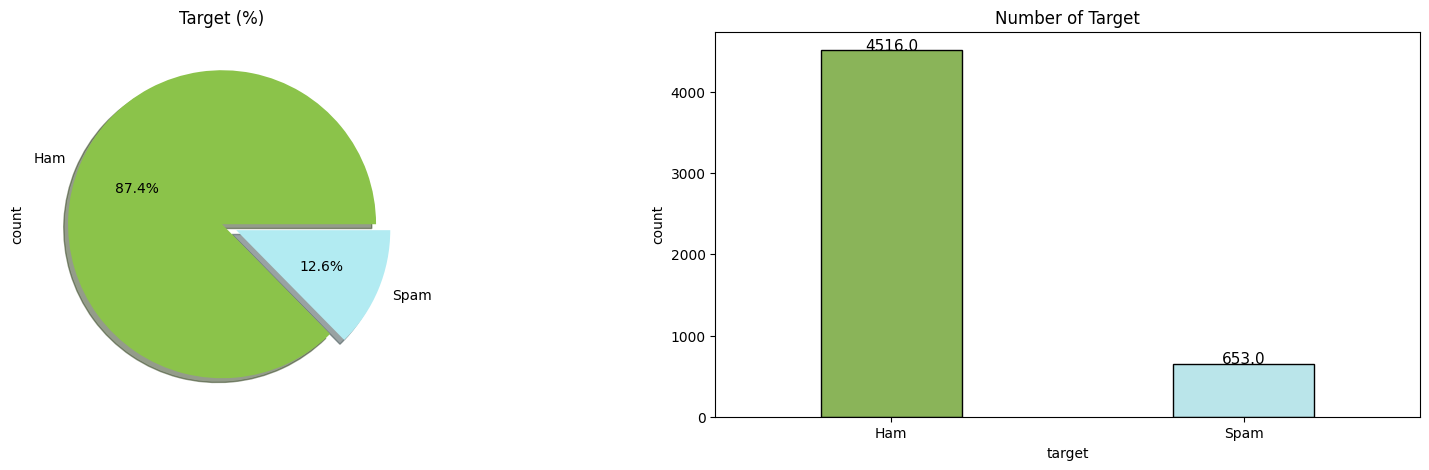

In [13]:
l = df['target'].value_counts()
colors = ['#8BC34A','#B2EBF2']

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
l.plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True, labels=['Ham', 'Spam'], colors=colors)
plt.title('Target (%)')


plt.subplot(1,2,2)
ax = sns.countplot(x='target',data = df, palette = colors,edgecolor = 'black', width=0.4)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['Ham', 'Spam'])
plt.title('Number of Target')
plt.show()

In [14]:
# scale_pos_weight is the ratio of number of negative class to the positive class
scale_pos_weight = df['target'].value_counts()[0] / df['target'].value_counts()[1]

In [15]:
x = df['Message']
y = df['target']

## TODO

1. Have a look at the CountVectorizer and TfidfVectorizer.
2. Can you link their featues/API to the topic of our lecture (bag of words, n-grams, tf-idf...)?
3. Implement and evaluate both vectorizers and evaluate the ML models below (for now, just ignore the training and evaluation code). We use F1-Score as our metric. How do you interpret the results?
4. Explore different parameters for the vectorizers. Can you improve the results?

Links:

- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [16]:
feature_extractor = CountVectorizer(lowercase=False)
#feature_extractor = TfidfVectorizer(lowercase=False)

x_extraction = feature_extractor.fit_transform(x)

In [17]:
# inspect the feature names

import random
random.seed(123)

total_features = len(feature_extractor.get_feature_names_out())
print("Total No Features: %s \n" % total_features)
sample_indices = random.sample(range(total_features), 20, )
for index in sample_indices:
    print(feature_extractor.get_feature_names_out()[index])

Total No Features: 10800 

9am
acknowledgement
Christmas
gotbabes
accept
Everyday
4wrd
experience
range
sen
coming
covers
9758
MARRIED
Host
contribute
seekers
complimentary
UpgrdCentre
MY


## ML Model Training and Evaluation Code

In [18]:
# data splitting, model evaluation metrics, cross-validation, hyperparameter tuning, and classification performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


# necessary classifiers for building machine learning models
from sklearn.linear_model import LogisticRegression

In [19]:
# Splitting the resampled data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x_extraction, y, test_size=0.3, random_state=101)

In [27]:
len(x_train[0].toarray()[0])

10800

In [20]:
# Defining a function to train and evaluate a machine learning classifier model

def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    print("F1 Score (test): ",'{0:.3%}'.format(f1_score(y_test,prediction)))

    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation F1 Score : ",'{0:.3%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'f1').mean()))



# Defining a function to evaluate the performance of a machine learning classifier model
def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.3%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [21]:
# Initializing a Logistic Regression classifier with specific hyperparameters

classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2')

F1 Score (test):  87.766%
Cross Validation F1 Score :  91.519%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1343
           1       0.98      0.79      0.88       208

    accuracy                           0.97      1551
   macro avg       0.98      0.90      0.93      1551
weighted avg       0.97      0.97      0.97      1551



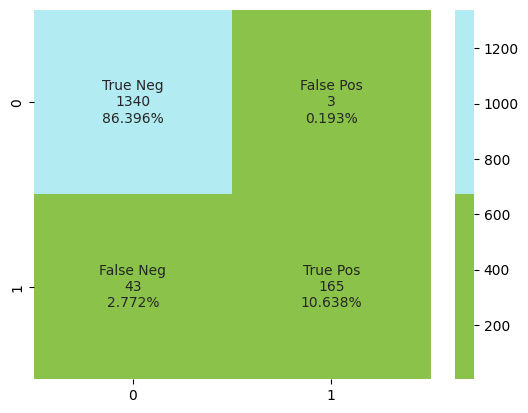

In [22]:
# Training, evaluating, and evaluating the performance of a Logistic Regression classifier model

model(classifier_lr,x_train,y_train,x_test,y_test)
model_evaluation(classifier_lr,x_test,y_test)